In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
harbhajansingh21_german_traffic_sign_dataset_path = kagglehub.dataset_download('harbhajansingh21/german-traffic-sign-dataset')

print('Data source import complete.')

Data source import complete.


In [ ]:
!pip install gradio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save your model
model.save('/content/drive/MyDrive/my_model.h5')

# Save any file
with open('/content/drive/MyDrive/my_file.txt', 'w') as f:
    f.write('Important data')

In [ ]:
# Re-load model
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/my_model.h5')

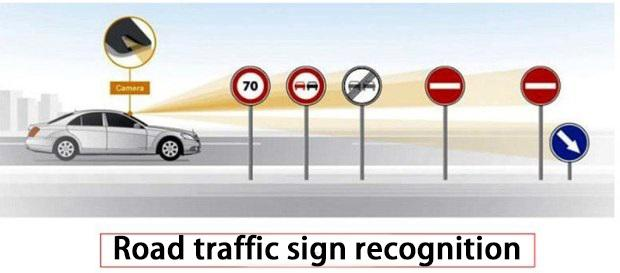

# Traffic Sign Recognition Classifier

In this project, we developed a Traffic Sign Classification model using various neural network architectures, including AlexNet and CNN. The objective was to accurately classify traffic signs based on their visual features.

We trained and evaluated each model using a large dataset of traffic sign images. The training process involved optimizing the model parameters and adjusting hyperparameters to achieve the best performance. We utilized different architectural configurations for each model to explore their capabilities in traffic sign classification.

Our experimental results showed remarkable accuracy across the different models. The model accuracies ranged from 96% to 98% during training, indicating their ability to learn and classify the various traffic sign classes accurately. Furthermore, the test accuracy results ranged between 86% to 97%, demonstrating the models' generalization performance on unseen data.

Overall, our study demonstrated the effectiveness of utilizing various neural network architectures for traffic sign classification. The obtained accuracies provide evidence of the models' capability to recognize and classify traffic signs accurately. These findings contribute to the development of intelligent transportation systems and pave the way for enhanced road safety through automated traffic sign recognition.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#cd /content/drive/MyDrive/COMP8610_Final_Project/Traffic-sign-classification
#import os
#os.chdir('/content/drive/MyDrive/COMP8610_Final_Project/Traffic-sign-classification')

In [ ]:
#!ls

## Dataset
I downloded the German Traffic Sign Recognition Benchmark Data-set from the below source:
https://www.v7labs.com/open-datasets/gtsrb#:~:text=The%20German%20Traffic%20Sign%20Recognition,light%20conditions%20and%20rich%20backgrounds.&text=V7%20uses%20cookies%20to%20keep,your%20experience%20and%20for%20marketing.


## Import Packages and Load Dataset

In [ ]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv


## Loading datasets
training_file = '/kaggle/input/german-traffic-sign-dataset/train.p'
validation_file='/kaggle/input/german-traffic-sign-dataset/valid.p'
testing_file = '/kaggle/input/german-traffic-sign-dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv("/kaggle/input/german-traffic-sign-dataset/signname.csv").values[:, 1]

#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Dataset Summary & Exploration

In [ ]:
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Histogram of class distrubtions across data set splits

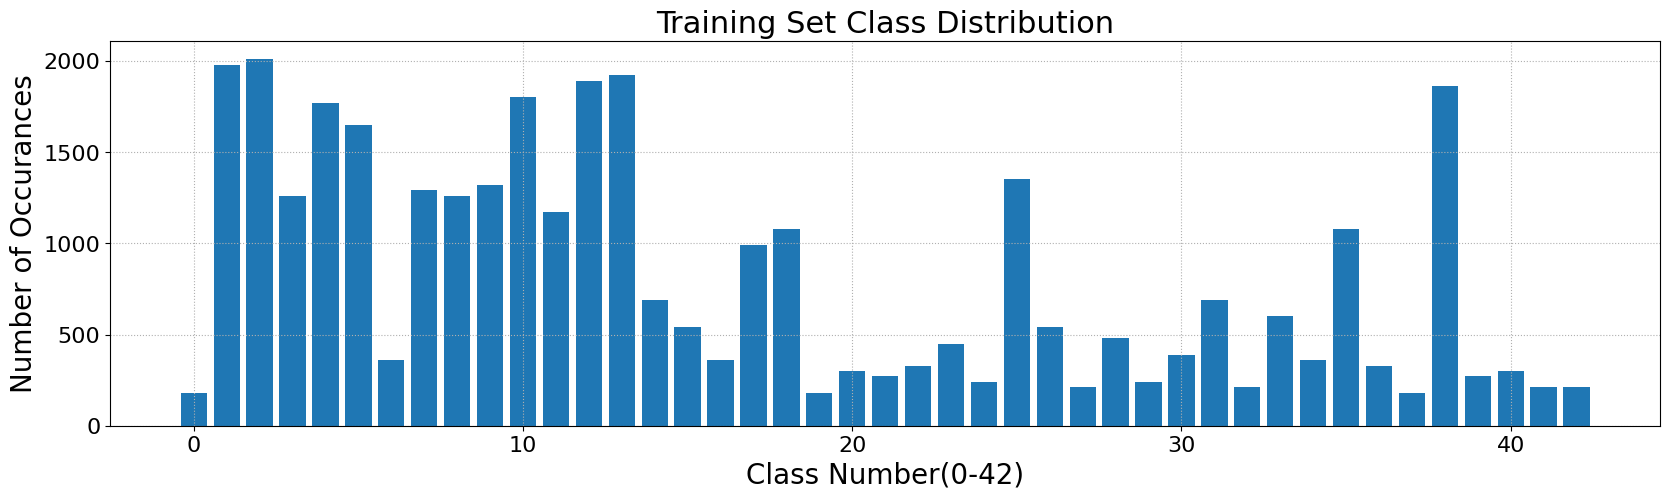

In [ ]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

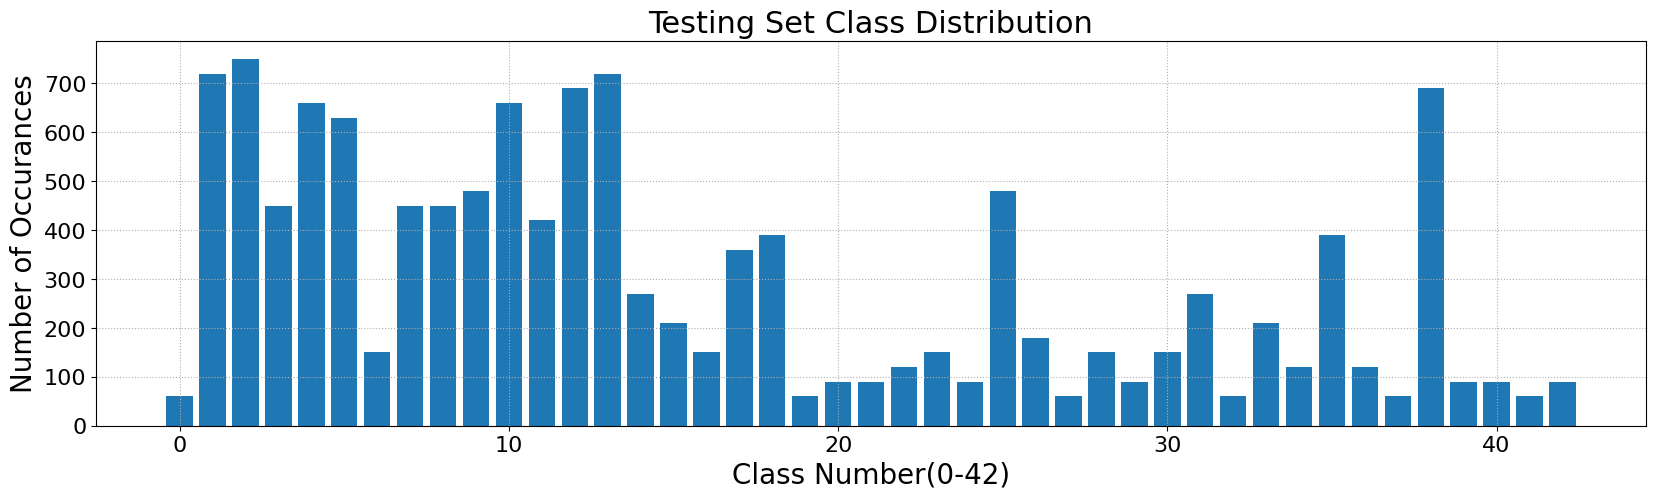

In [ ]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

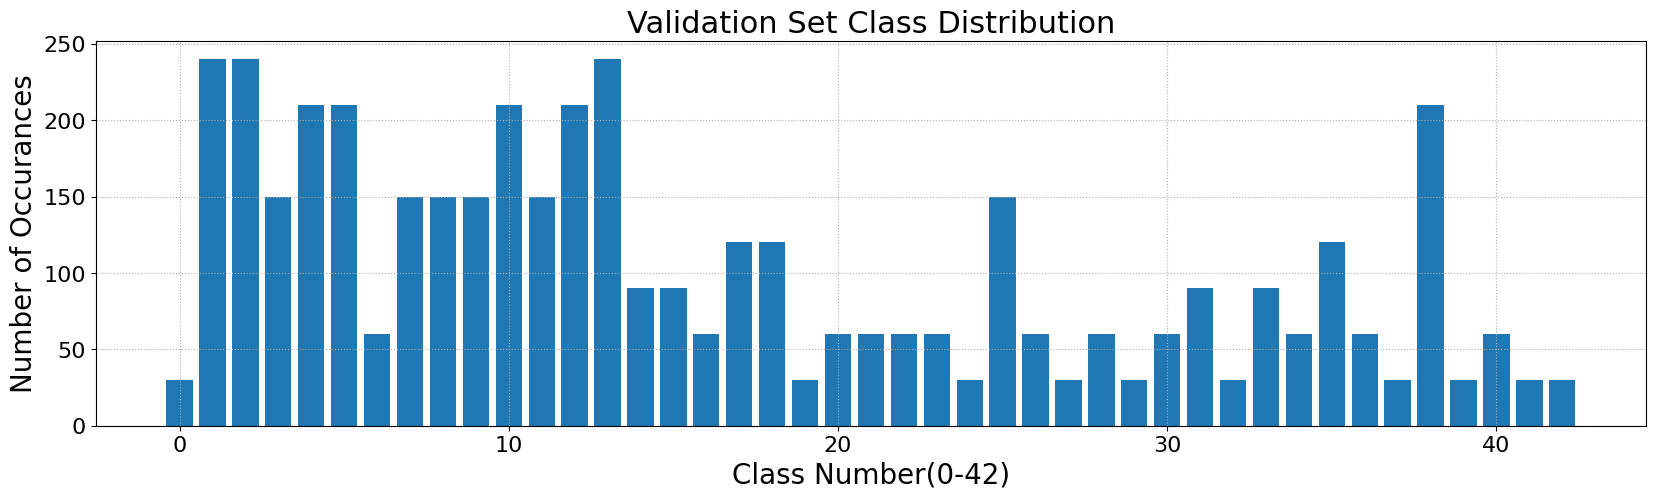

In [ ]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

### Visualise all Images Classes

0 . Class :  Speed limit (20km/h)


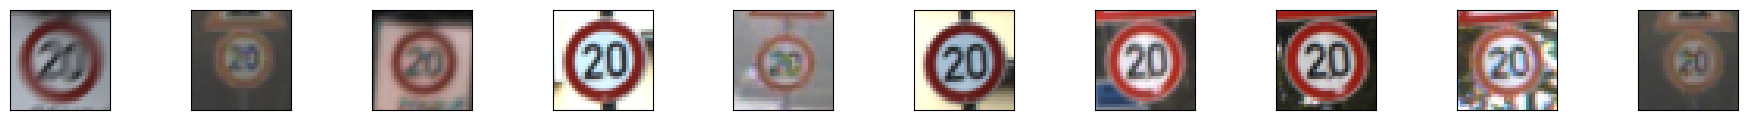

1 . Class :  Speed limit (30km/h)


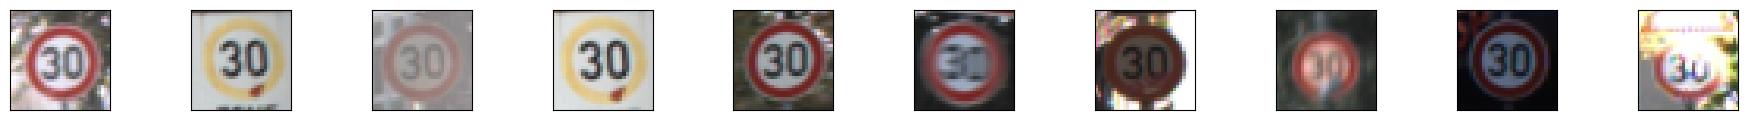

2 . Class :  Speed limit (50km/h)


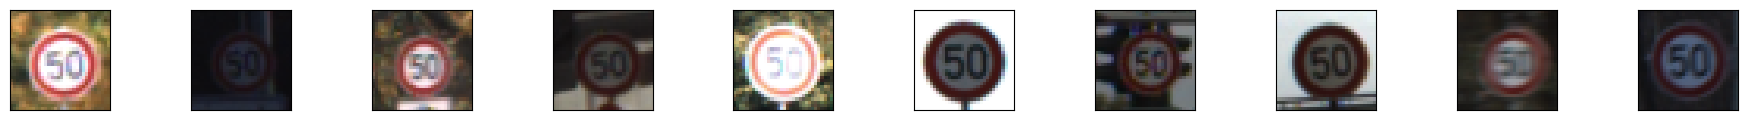

3 . Class :  Speed limit (60km/h)


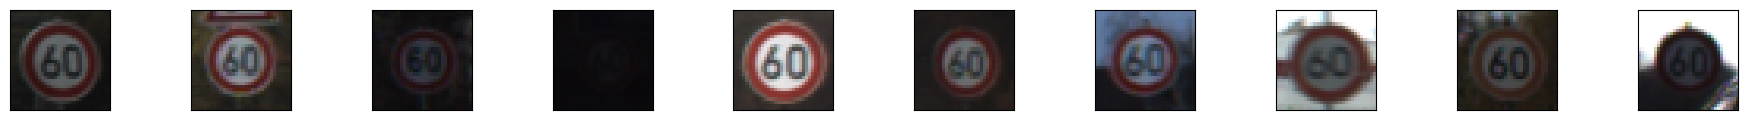

4 . Class :  Speed limit (70km/h)


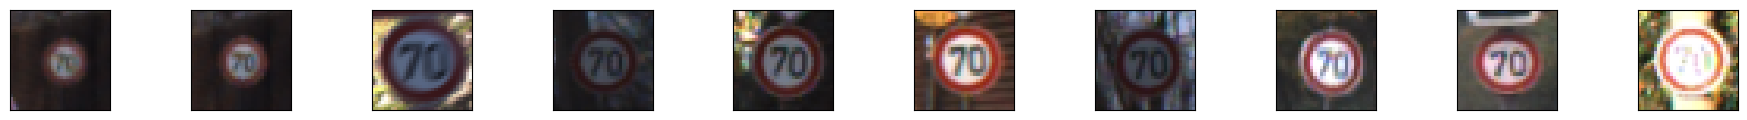

5 . Class :  Speed limit (80km/h)


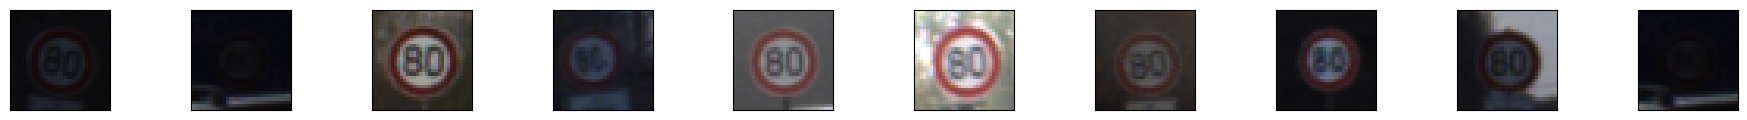

6 . Class :  End of speed limit (80km/h)


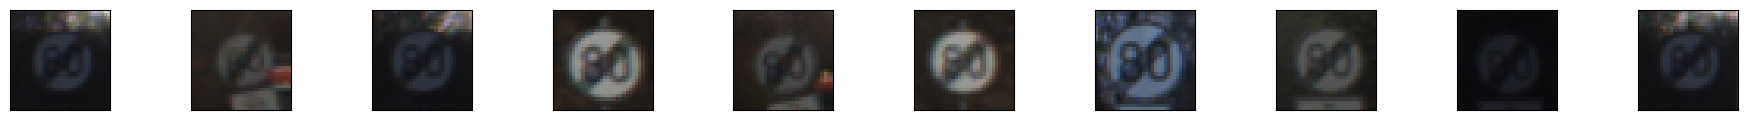

7 . Class :  Speed limit (100km/h)


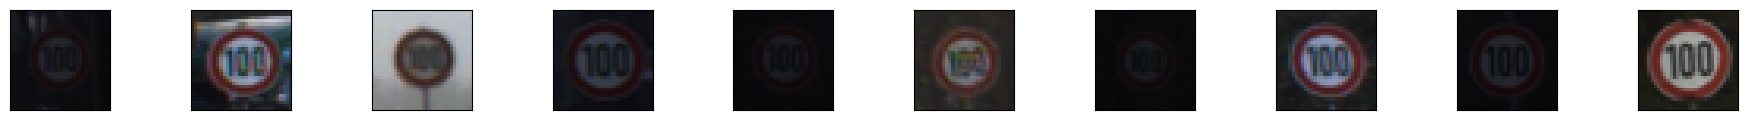

8 . Class :  Speed limit (120km/h)


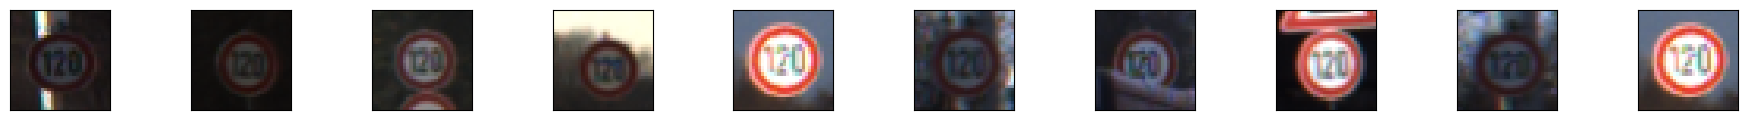

9 . Class :  No passing


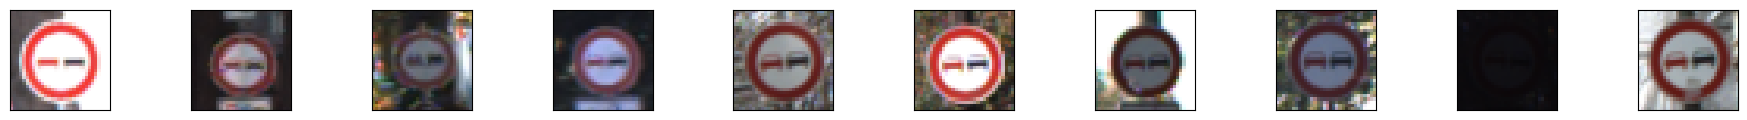

10 . Class :  No passing for vehicles over 3.5 metric tons


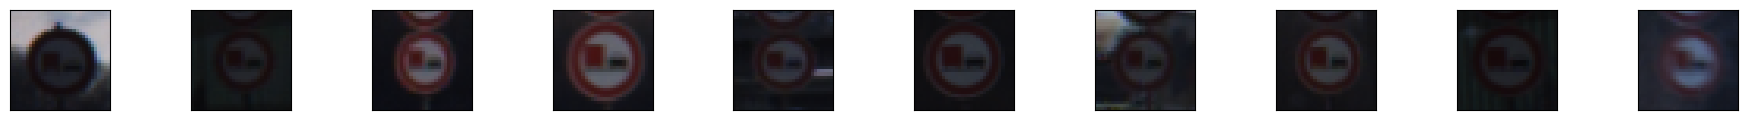

11 . Class :  Right-of-way at the next intersection


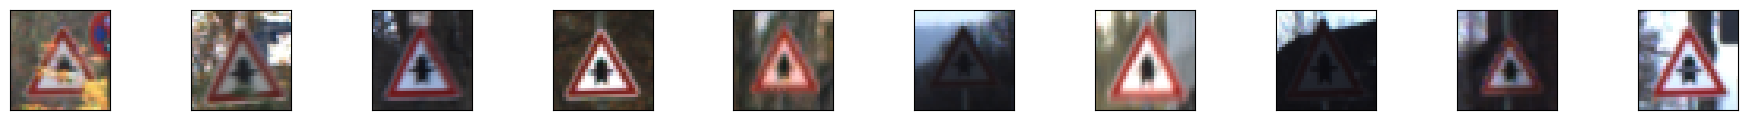

12 . Class :  Priority road


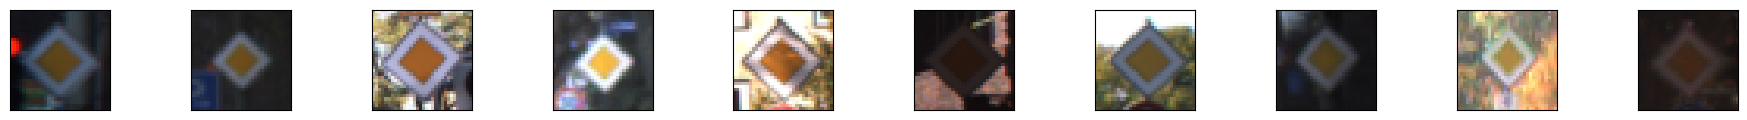

13 . Class :  Yield


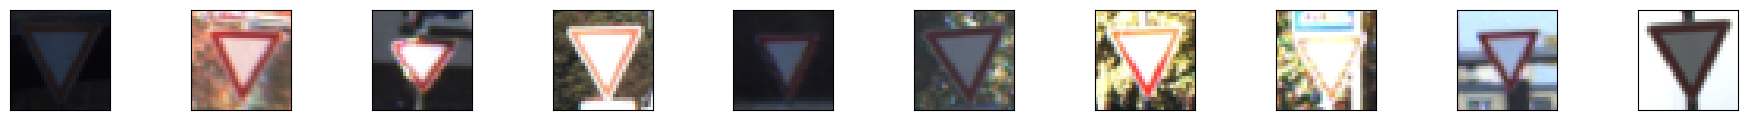

14 . Class :  Stop


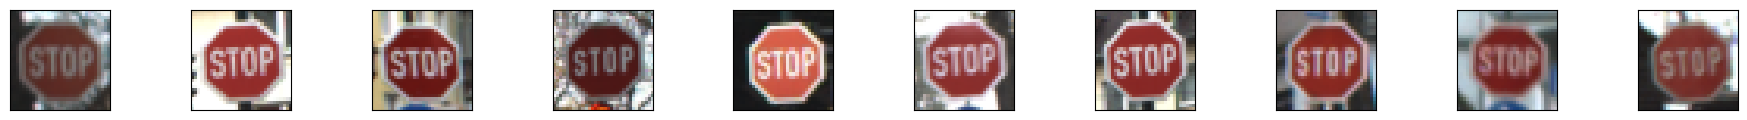

15 . Class :  No vehicles


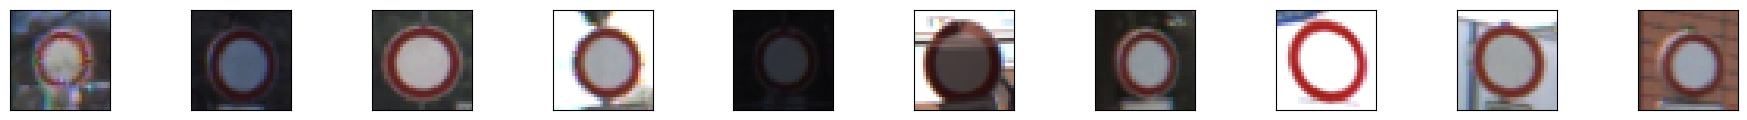

16 . Class :  Vehicles over 3.5 metric tons prohibited


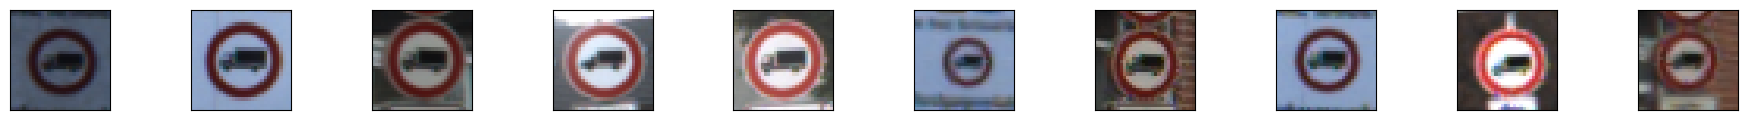

17 . Class :  No entry


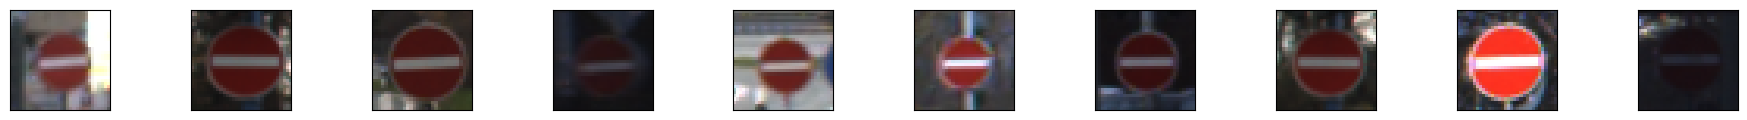

18 . Class :  General caution


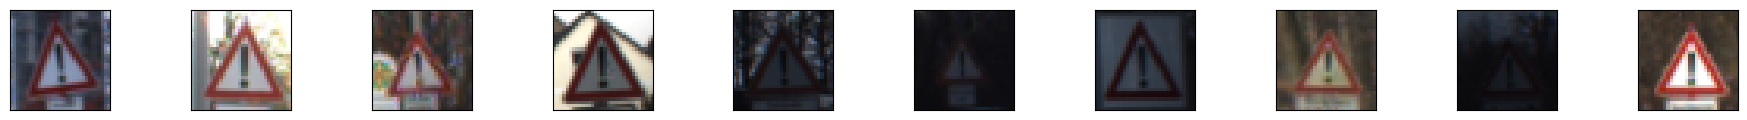

19 . Class :  Dangerous curve to the left


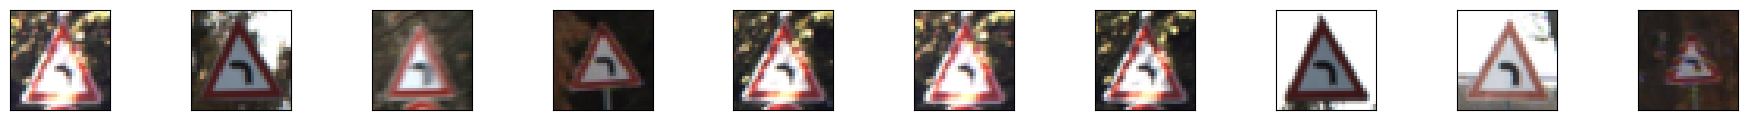

20 . Class :  Dangerous curve to the right


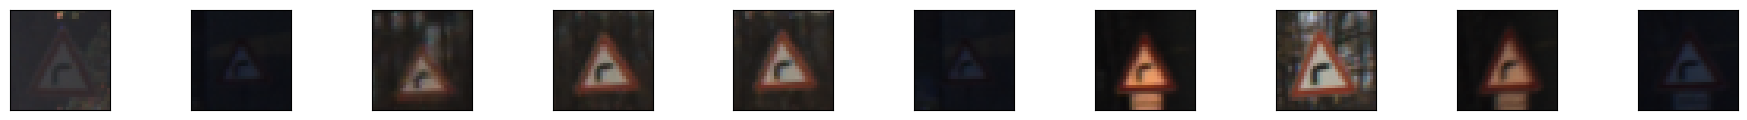

21 . Class :  Double curve


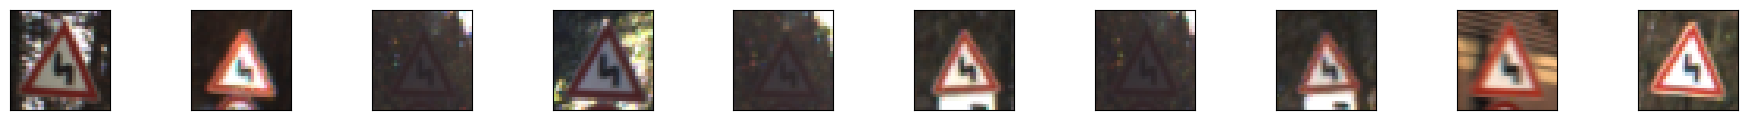

22 . Class :  Bumpy road


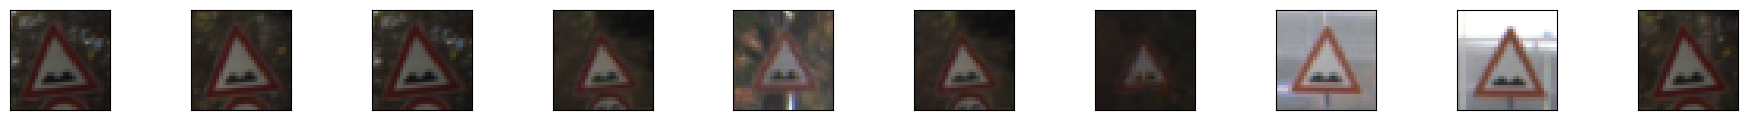

23 . Class :  Slippery road


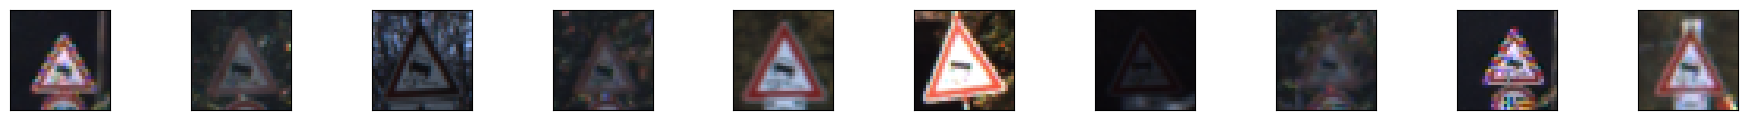

24 . Class :  Road narrows on the right


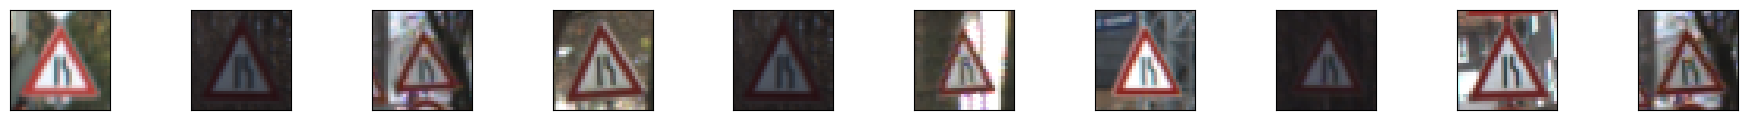

25 . Class :  Road work


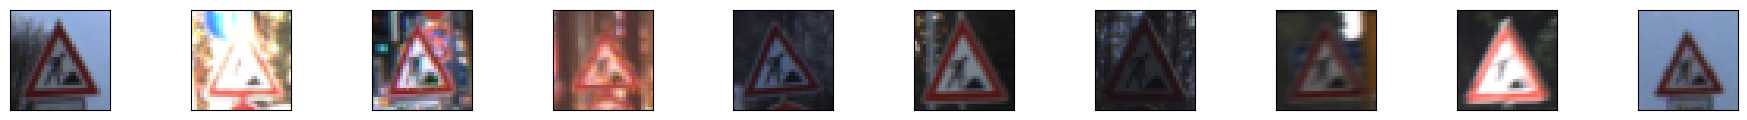

26 . Class :  Traffic signals


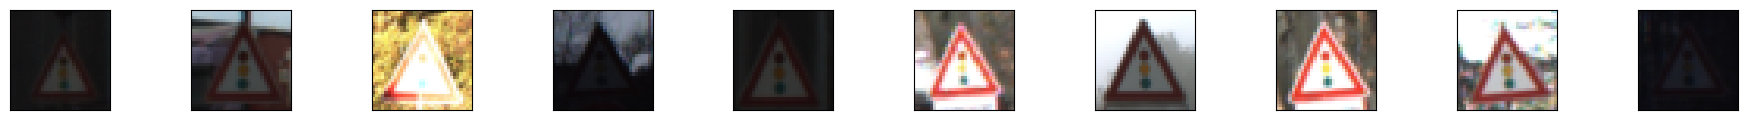

27 . Class :  Pedestrians


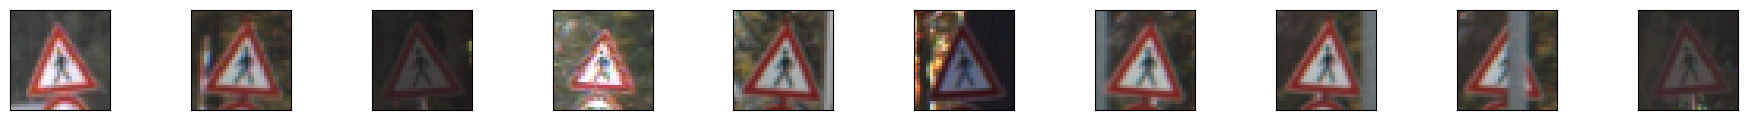

28 . Class :  Children crossing


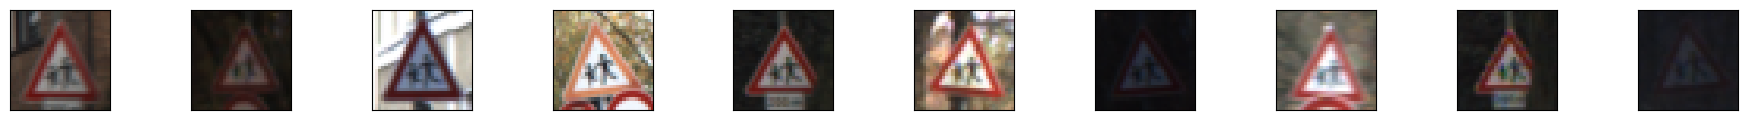

29 . Class :  Bicycles crossing


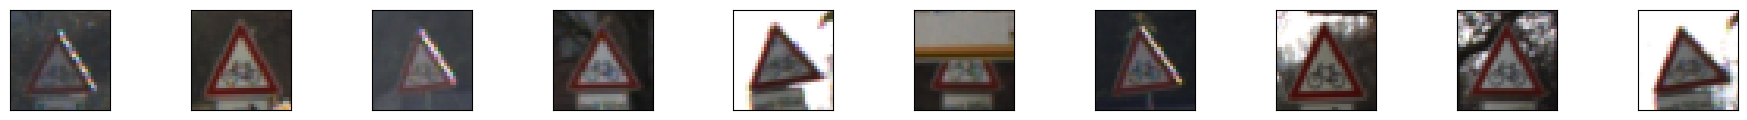

30 . Class :  Beware of ice/snow


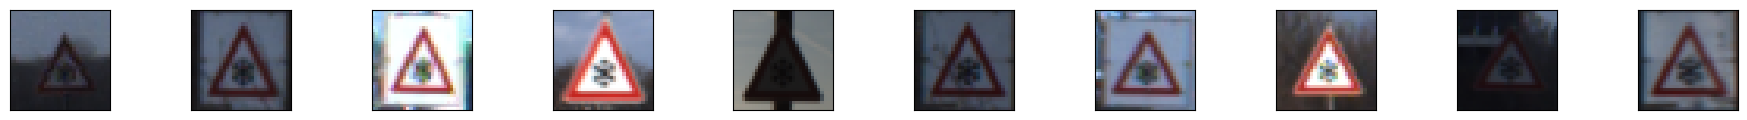

31 . Class :  Wild animals crossing


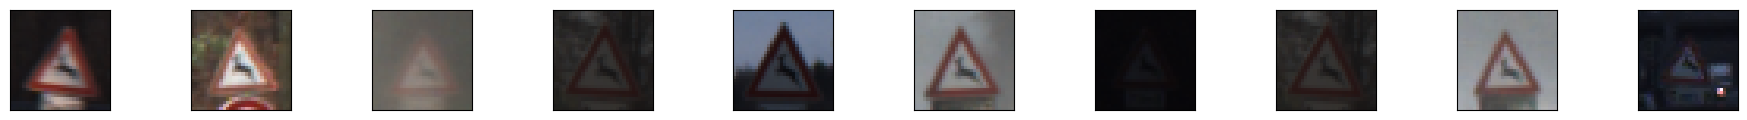

32 . Class :  End of all speed and passing limits


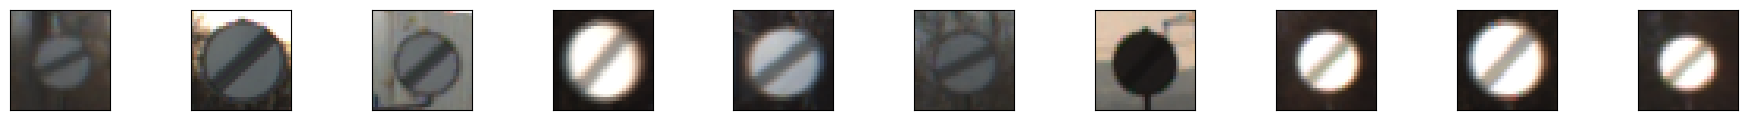

33 . Class :  Turn right ahead


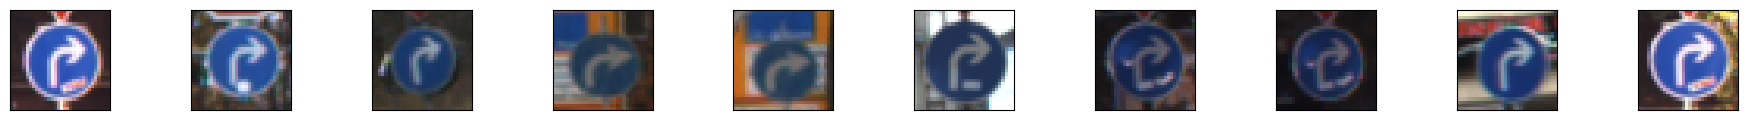

34 . Class :  Turn left ahead


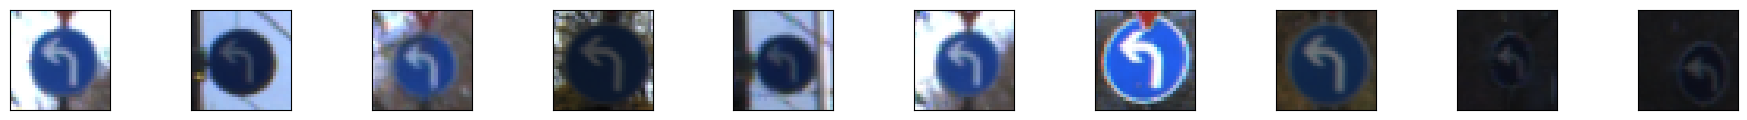

35 . Class :  Ahead only


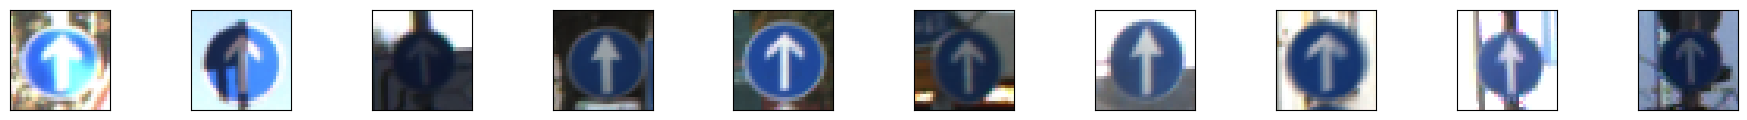

36 . Class :  Go straight or right


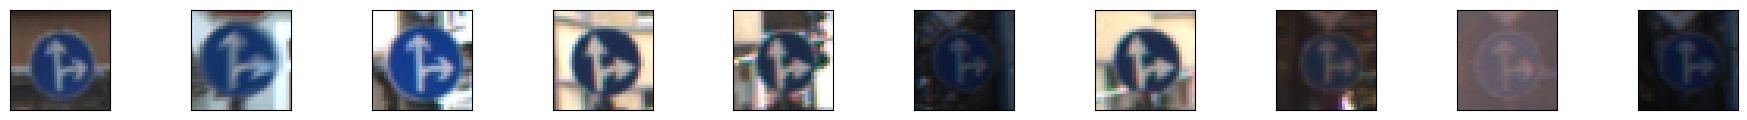

37 . Class :  Go straight or left


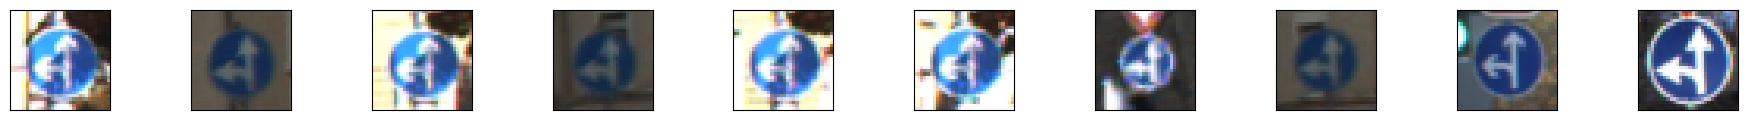

38 . Class :  Keep right


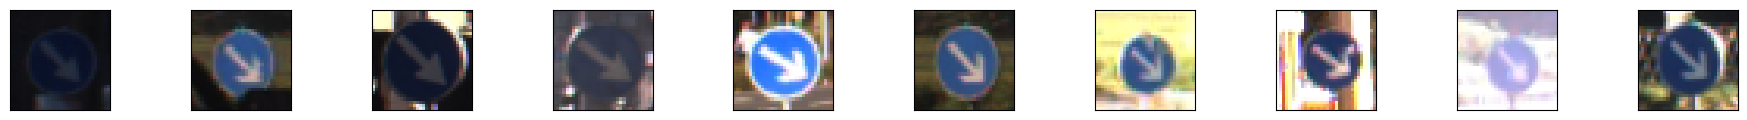

39 . Class :  Keep left


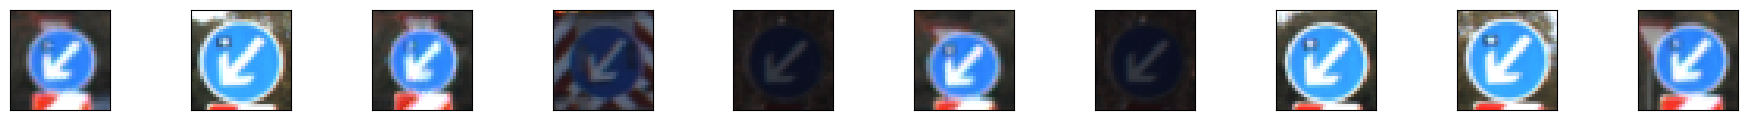

40 . Class :  Roundabout mandatory


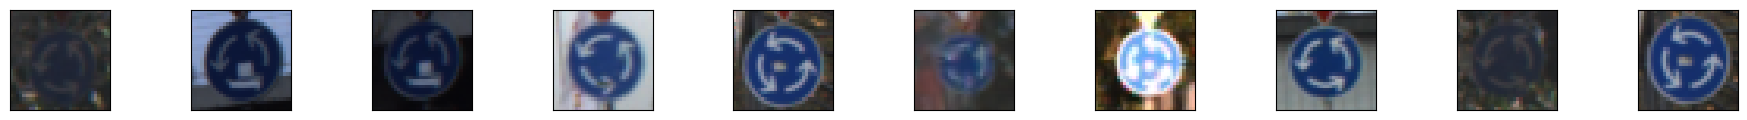

41 . Class :  End of no passing


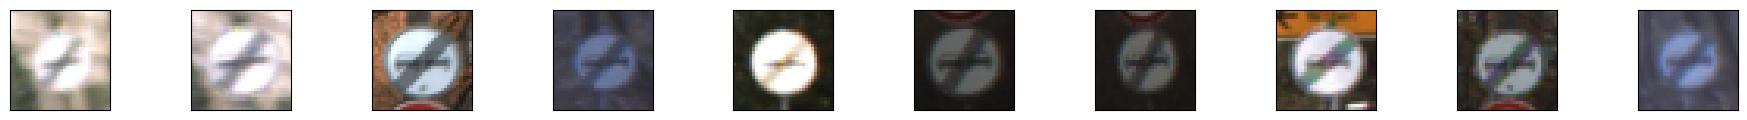

42 . Class :  End of no passing by vehicles over 3.5 metric


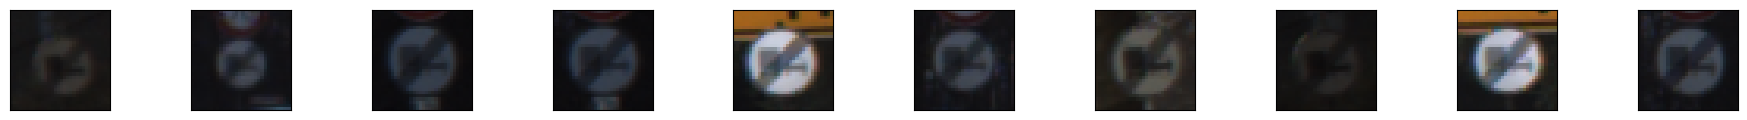

In [ ]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)

    pyplot.show()

### Brief Visual Overview of the Dataset

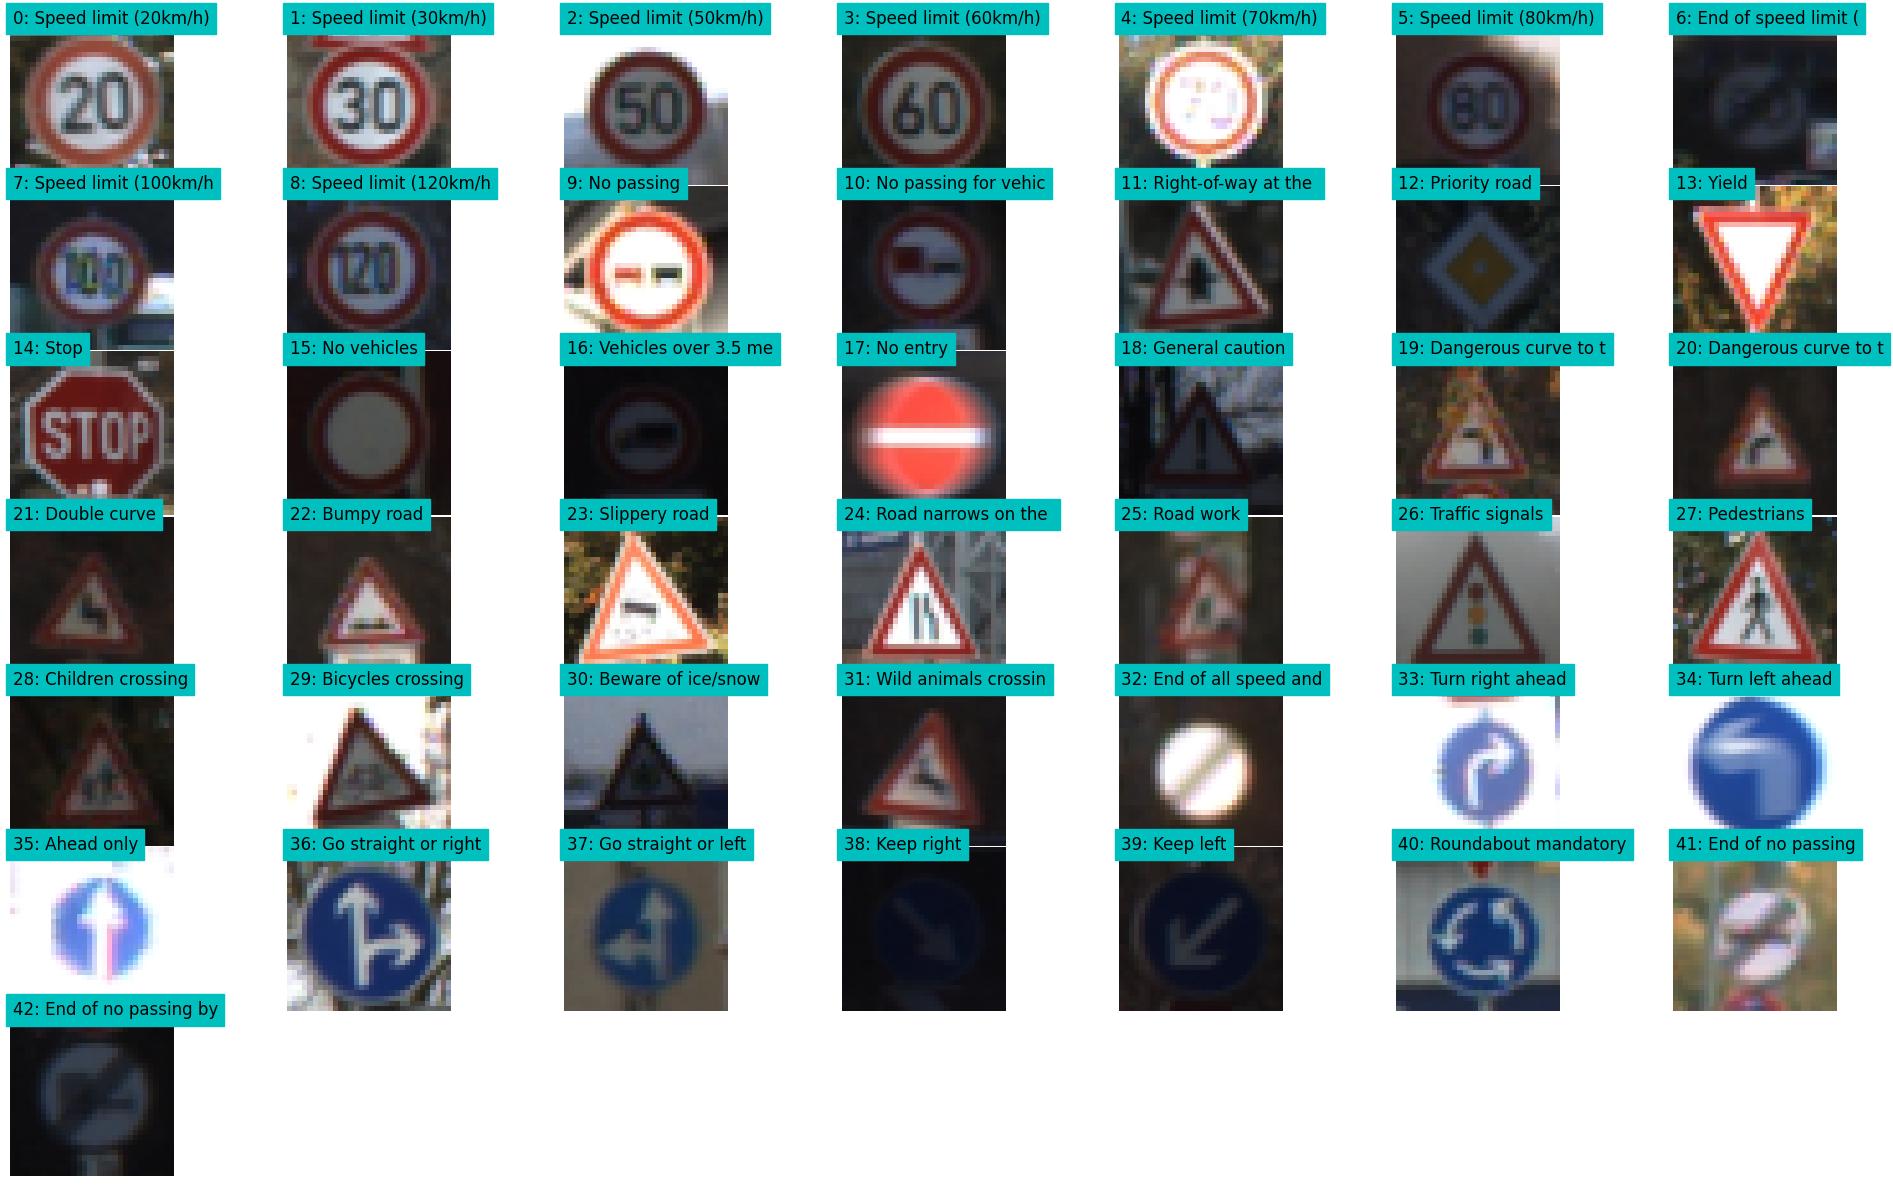

In [ ]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)


## Data Augmentation




In [ ]:
!pip install opencv-python

In [ ]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)

    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image


def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)


def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):

    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape


    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)


    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))


        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))


    return X_balance.astype(np.uint8), y_balance

### Data Augmentation by Rotation

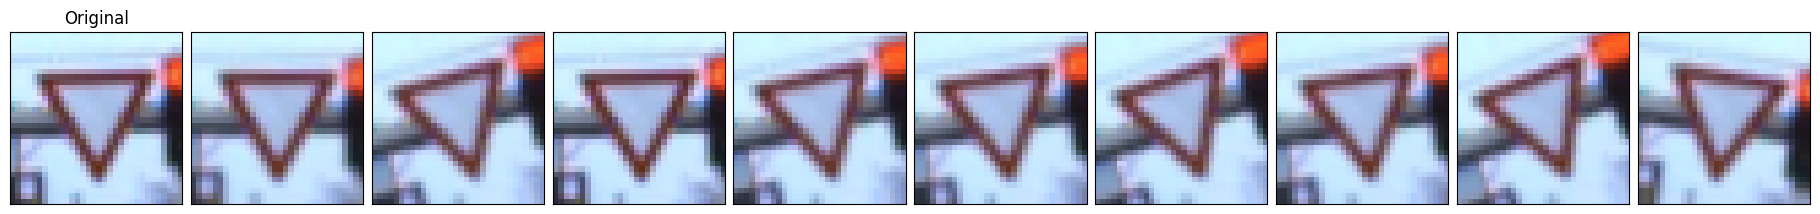

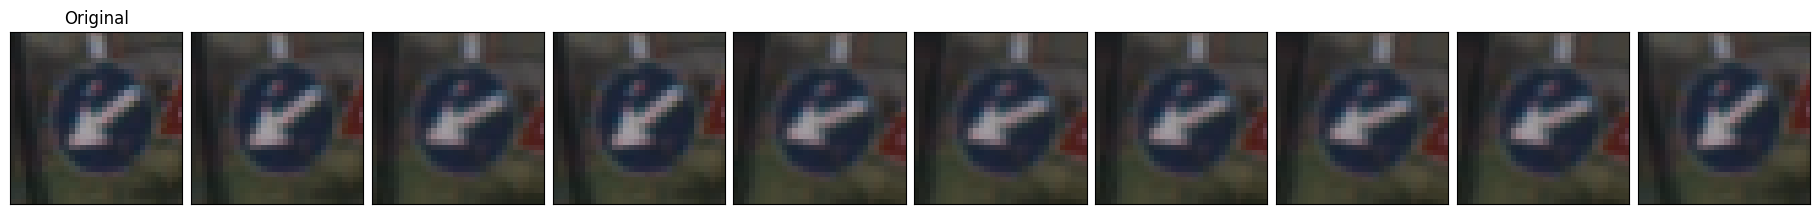

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Translation

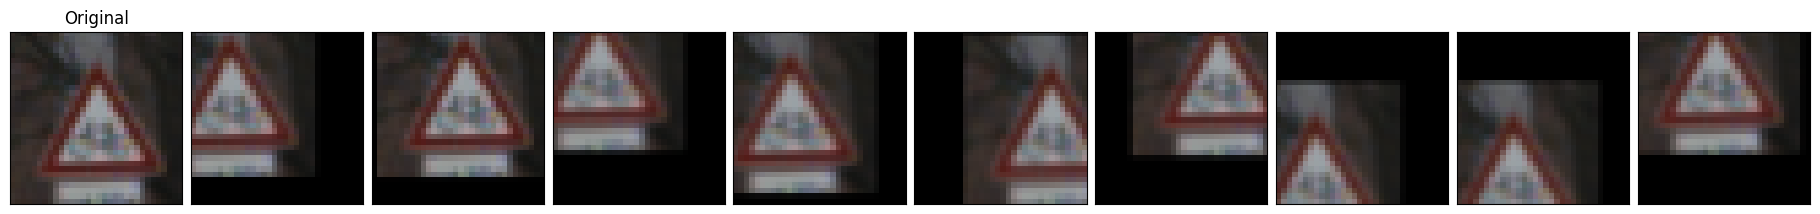

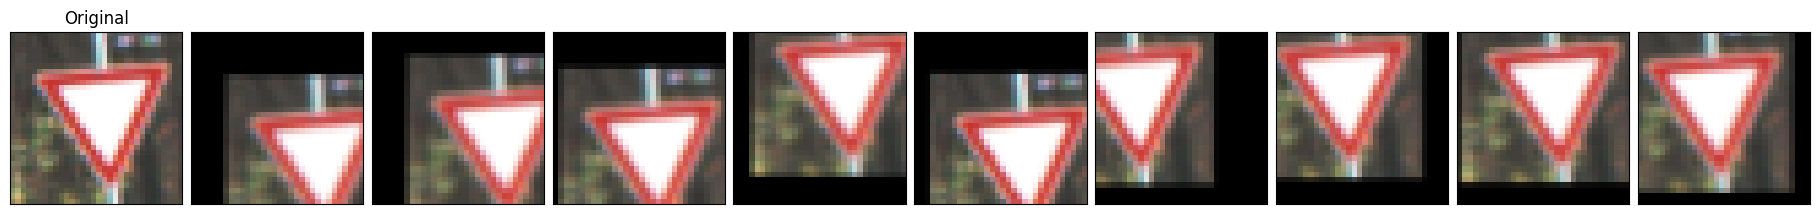

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Homography Projection

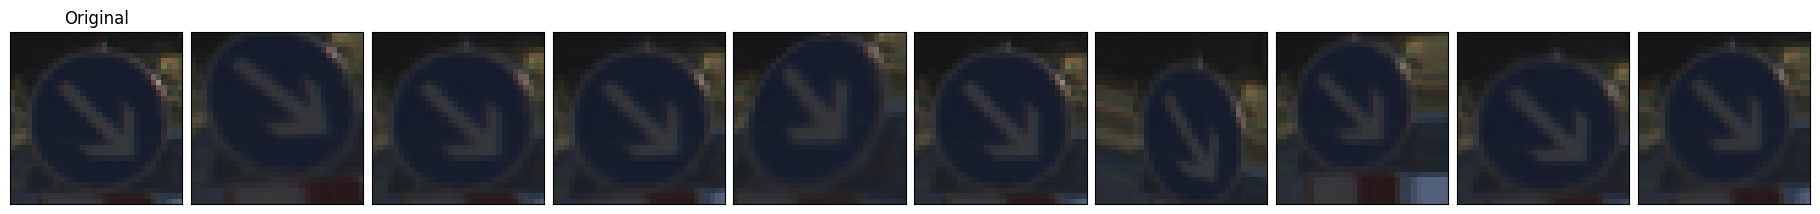

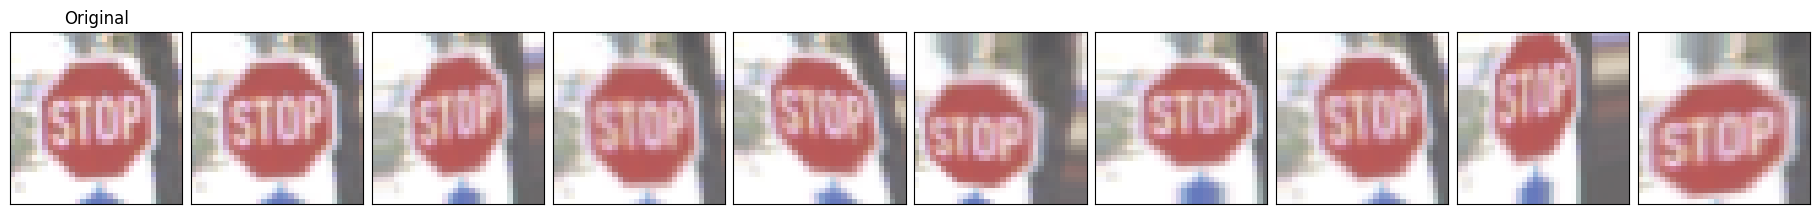

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

### Pipeline for Data Augmentation

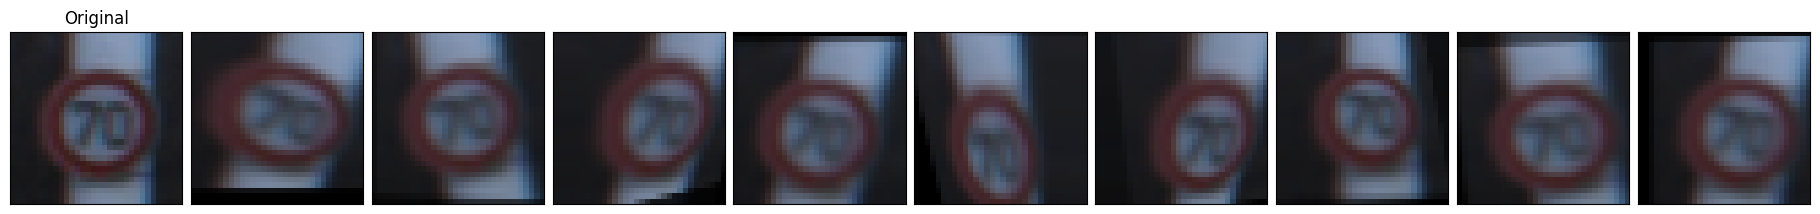

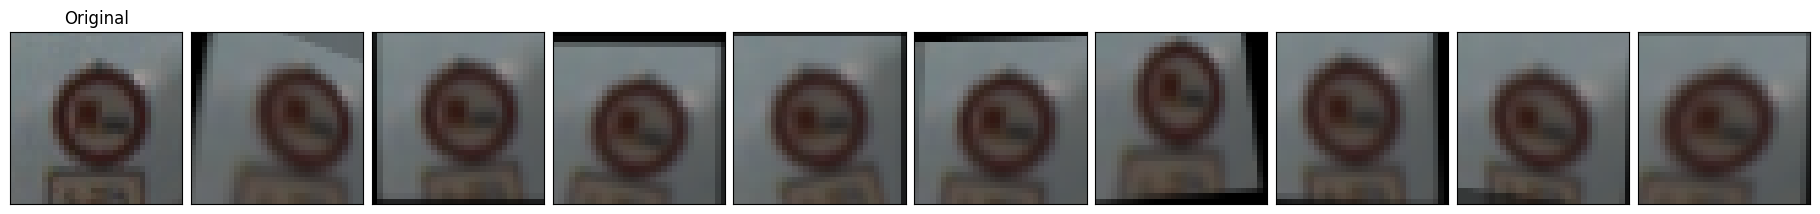

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

### Generate or Load Augmented Dataset

In [ ]:
####Only Run to generate Augmented data

#X_out, y_out = augment_and_balance_data(X_train, y_train, 5000)
#np.savez_compressed('Datasets/Augmented_Data/AugTrafficdata', X_train_aug = X_out, y_train_aug = y_out)

In [ ]:
##Load augmented data

# loaded = np.load('Datasets/Augmented_Data/AugTrafficdata.npz')
# X_train_aug = loaded['X_train_aug']
# y_train_aug = loaded['y_train_aug']
# print("Augmented Dataset size X", X_train_aug.shape)
# print("Augmented Dataset size y", y_train_aug.shape)


## Deep Classification Architectures

### Tensorflow Installation

In [ ]:
!pip install tensorflow

## Data Preprocessig

In [ ]:
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)

In [ ]:
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32

# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32

# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32

In [ ]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test

# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
# Shape of Train dataset
X_train.shape

(34799, 32, 32, 3)

In [ ]:
# Shape of Test dataset
X_test.shape

(12630, 32, 32, 3)

In [ ]:
# Shape of Validation dataset
X_valid.shape

(4410, 32, 32, 3)

## Model Architecture -1 : ALEXNET



In [ ]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 96)       │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4096)           │             

 Total params: 21,772,567 (83.06 MB)

 Trainable params: 21,753,345 (82.98 MB)

 Non-trainable params: 19,222 (75.09 KB)

In [ ]:
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(X_train_gray_norm, y_train, epochs=50, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 755s 692ms/step - accuracy: 0.2043 - loss: 3.1520 - val_accuracy: 0.5787 - val_loss: 1.6436
Epoch 2/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 792s 683ms/step - accuracy: 0.6781 - loss: 1.3285 - val_accuracy: 0.5884 - val_loss: 1.6393
Epoch 3/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 805s 685ms/step - accuracy: 0.8013 - loss: 0.8413 - val_accuracy: 0.7057 - val_loss: 1.1117
Epoch 4/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 750s 690ms/step - accuracy: 0.8617 - loss: 0.6071 - val_accuracy: 0.7544 - val_loss: 0.9078
Epoch 5/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 747s 686ms/step - accuracy: 0.8999 - loss: 0.4566 - val_accuracy: 0.7583 - val_loss: 0.9762
Epoch 6/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 822s 705ms/step - accuracy: 0.9250 - loss: 0.3565 - val_accuracy: 0.7810 - val_loss: 0.8258
Epoch 7/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 793s 697ms/step - accuracy: 0.9379 - loss: 0.2958 - val_accuracy: 0.7565 - val_loss: 0.9641
Epoch 8/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 804s 698ms/step - ac

In [ ]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

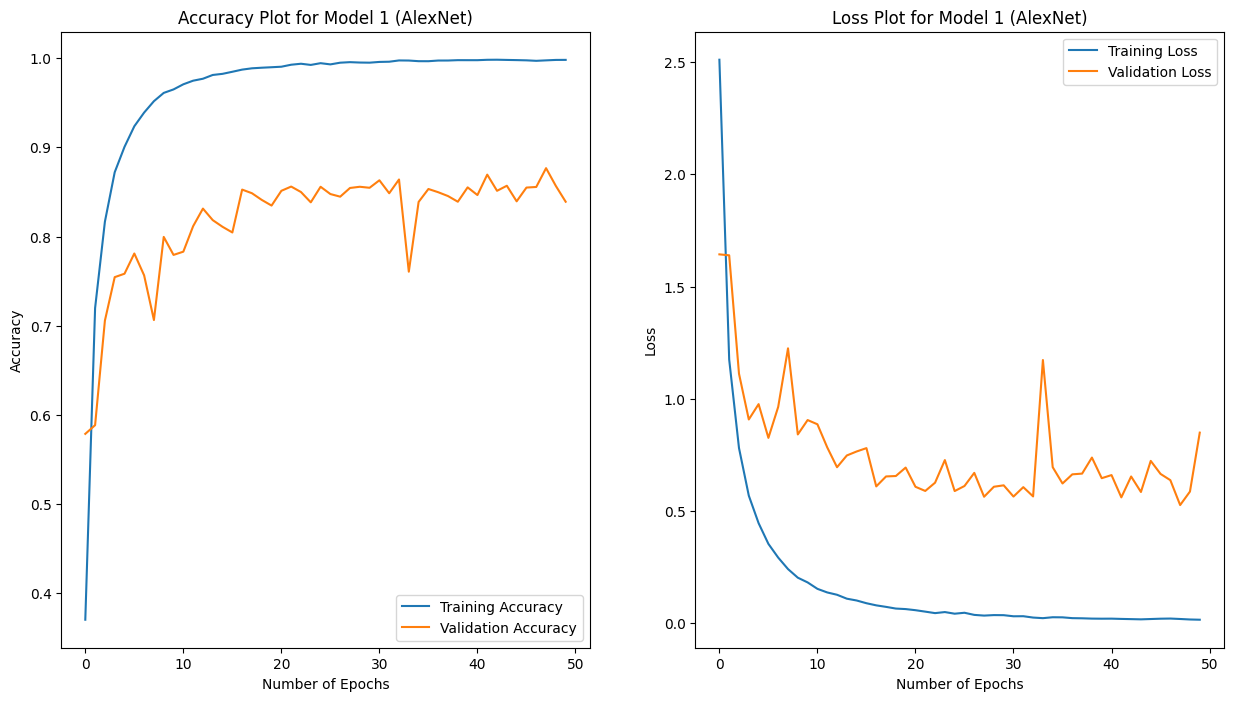

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 1 (AlexNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 1 (AlexNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()

### Model 1 Evaluation & Report

In [ ]:
New_model1.evaluate(X_test_gray_norm, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.8601 - loss: 0.6629


[0.684539258480072, 0.853919267654419]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)

395/395 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        60
           1       0.92      0.95      0.93       720
           2       0.88      0.91      0.90       750
           3       0.81      0.80      0.81       450
           4       0.90      0.85      0.88       660
           5       0.79      0.89      0.84       630
           6       0.98      0.82      0.89       150
           7       0.87      0.77      0.82       450
           8       0.83      0.86      0.84       450
           9       0.94      0.89      0.91       480
          10       0.92      0.97      0.95       660
          11       0.95      0.84      0.89       420
          12       0.77      0.99      0.87       690
          13       1.00      0.99      0.99       720
          14       0.98      0.81      0.89       270
          15       0.98      0.92      0.95   

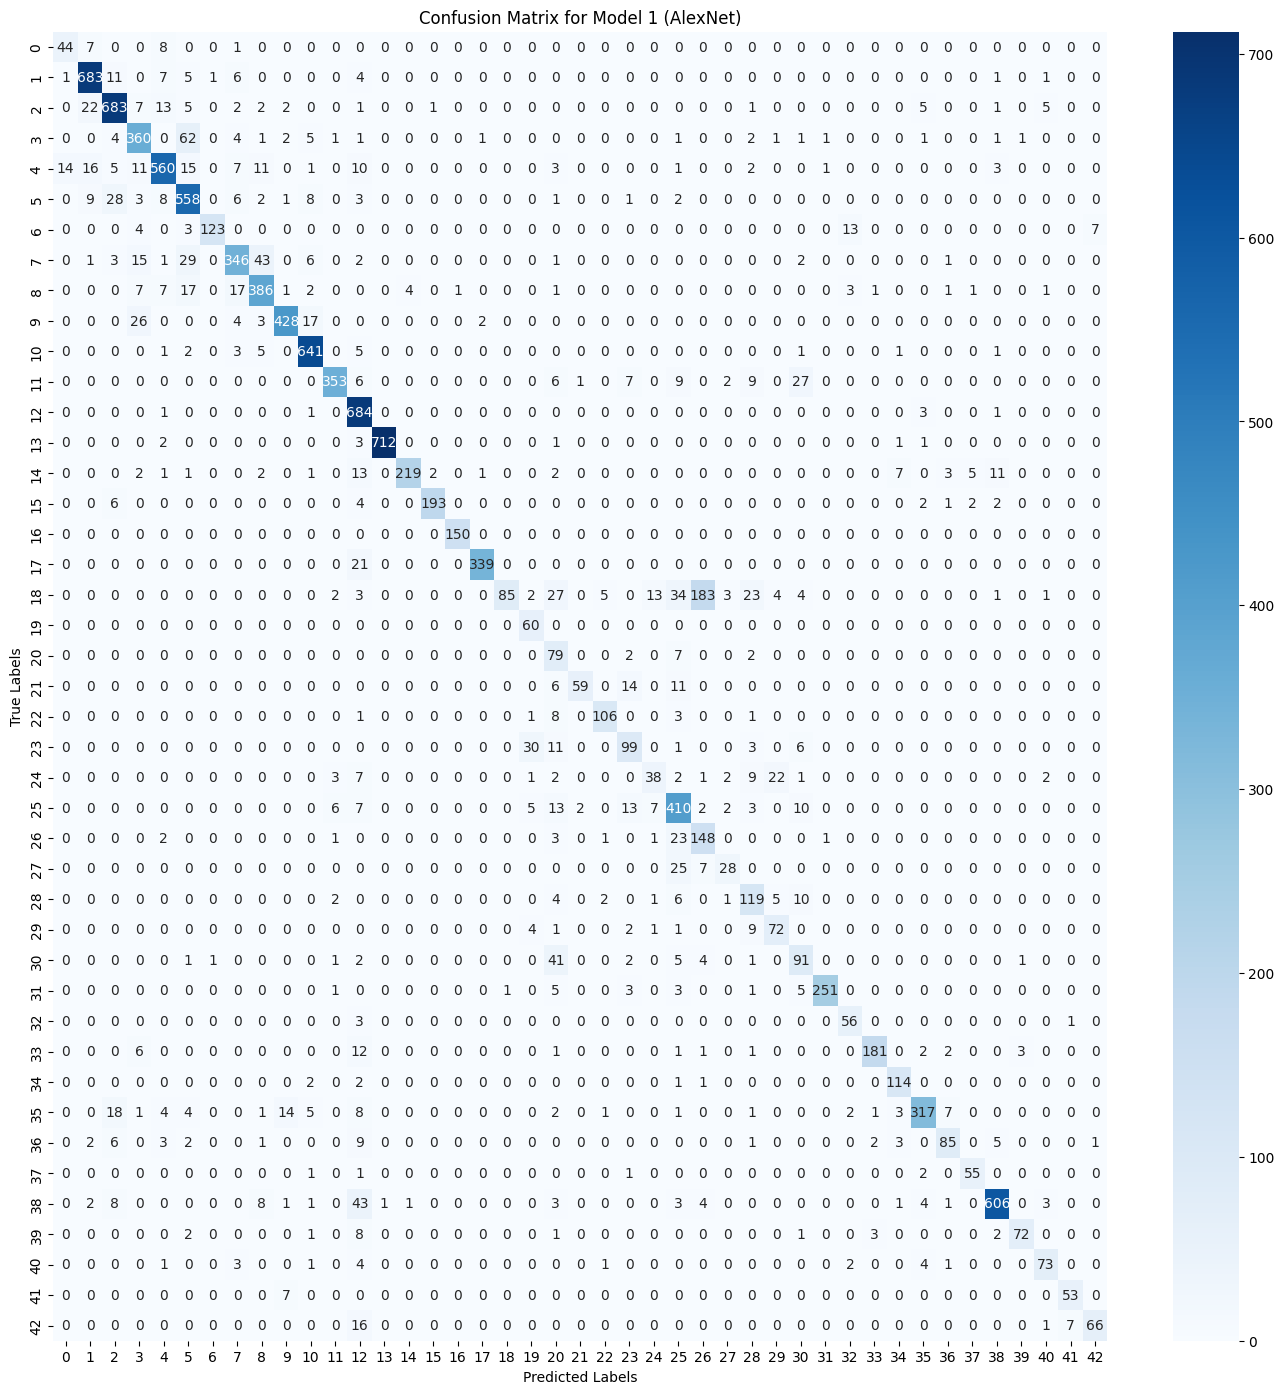

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 1 (AlexNet)')
plt.show()

## Model Architecture - 2: CNN



In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D, Dropout

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, 'same' padding, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))

# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,491 (1.12 MB)

 Trainable params: 292,491 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define early stopping callback to monitor validation loss and stop training if it doesn't improve for 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('best_CNN_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Compile the model with the specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation),
                    shuffle=True,
                    callbacks=[stop, mc])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9957 - loss: 0.0168
Epoch 1: val_loss improved from inf to 0.10355, saving model to best_CNN_model.h5


70/70 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.9957 - loss: 0.0168 - val_accuracy: 0.9810 - val_loss: 0.1035
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9957 - loss: 0.0135
Epoch 2: val_loss did not improve from 0.10355
70/70 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9834 - val_loss: 0.1075
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9965 - loss: 0.0119
Epoch 3: val_loss improved from 0.10355 to 0.09320, saving model to best_CNN_model.h5


70/70 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9807 - val_loss: 0.0932
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9963 - loss: 0.0122
Epoch 4: val_loss did not improve from 0.09320
70/70 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9963 - loss: 0.0122 - val_accuracy: 0.9776 - val_loss: 0.1537
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9963 - loss: 0.0124
Epoch 5: val_loss did not improve from 0.09320
70/70 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9803 - val_loss: 0.0969
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9971 - loss: 0.0106
Epoch 6: val_loss did not improve from 0.09320
70/70 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9970 - loss: 0.0106 - val_accuracy: 0.9821 - val_loss: 0.1456
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9962 - loss: 0.0122
Epoch 7: val_loss did not improve from 0.09320
70/70 ━━━━━━━━━━

70/70 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9850 - val_loss: 0.0841
Epoch 19/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9965 - loss: 0.0113
Epoch 19: val_loss did not improve from 0.08412
70/70 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9832 - val_loss: 0.1471
Epoch 20/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9971 - loss: 0.0089
Epoch 20: val_loss did not improve from 0.08412
70/70 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9971 - loss: 0.0089 - val_accuracy: 0.9868 - val_loss: 0.1027
Epoch 21/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9974 - loss: 0.0082
Epoch 21: val_loss did not improve from 0.08412
70/70 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9773 - val_loss: 0.1419
Epoch 22/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9974 - loss: 0.0096
Epoch 22: val_loss did not improve from 0.08412
70/70 ━━

70/70 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.9974 - loss: 0.0076 - val_accuracy: 0.9850 - val_loss: 0.0840
Epoch 27/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9973 - loss: 0.0077
Epoch 27: val_loss did not improve from 0.08396
70/70 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.9823 - val_loss: 0.0898
Epoch 28/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9975 - loss: 0.0078
Epoch 28: val_loss did not improve from 0.08396
70/70 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9834 - val_loss: 0.1126
Epoch 29/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0052
Epoch 29: val_loss did not improve from 0.08396
70/70 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9848 - val_loss: 0.1164
Epoch 30/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9977 - loss: 0.0083
Epoch 30: val_loss did not improve from 0.08396
70/70 ━━

70/70 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9844 - val_loss: 0.0607
Epoch 34/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9975 - loss: 0.0096
Epoch 34: val_loss did not improve from 0.06066
70/70 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9975 - loss: 0.0096 - val_accuracy: 0.9837 - val_loss: 0.1016
Epoch 35/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9974 - loss: 0.0090
Epoch 35: val_loss did not improve from 0.06066
70/70 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9857 - val_loss: 0.0703
Epoch 36/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9976 - loss: 0.0084
Epoch 36: val_loss did not improve from 0.06066
70/70 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.9875 - val_loss: 0.0714
Epoch 37/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9986 - loss: 0.0045
Epoch 37: val_loss did not improve from 0.06066
70/70 ━━

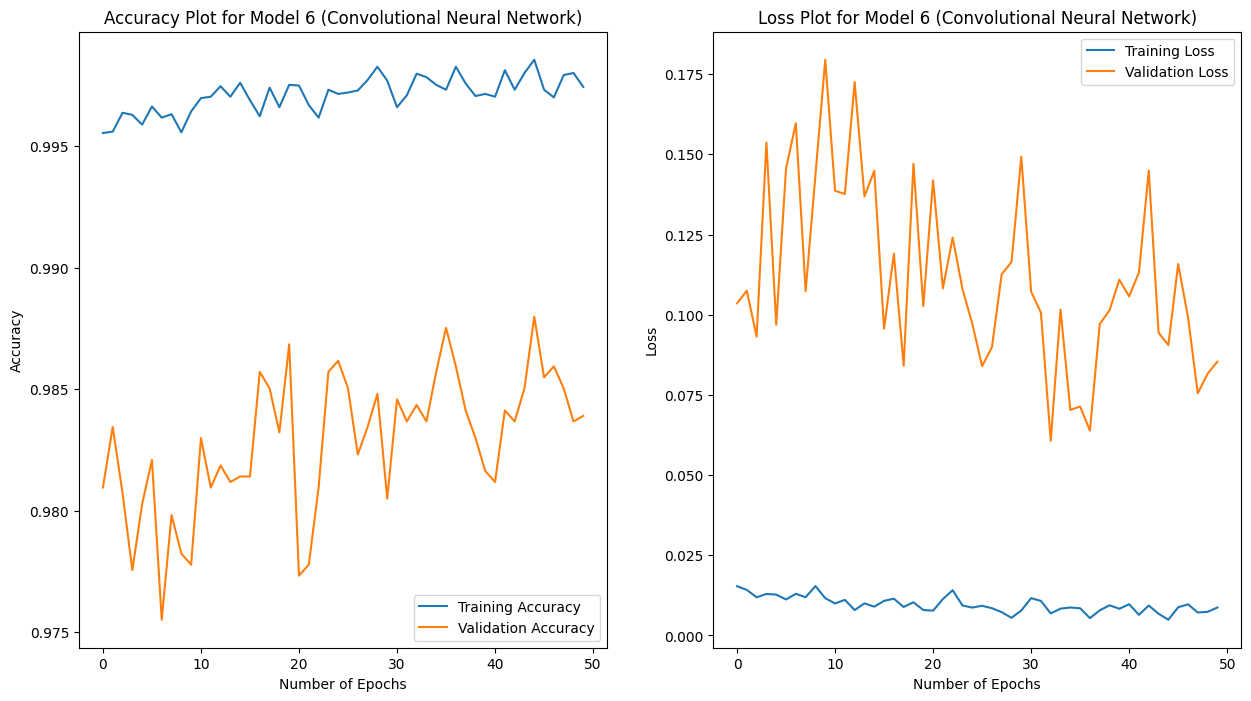

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 6 (Convolutional Neural Network)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 6 (Convolutional Neural Network)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()

### Model 2 Evaluation & Report

In [ ]:
from keras.models import Sequential, load_model

# Load the best trained model from the saved file
best_CNN_model = load_model('best_CNN_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_CNN_model.evaluate(X_test_gray_norm, y_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9759 - loss: 0.1483


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_CNN_model.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 6 (CNN):")
print(classification_rep)

395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step

Classification Report for Model 6 (CNN):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.94      1.00      0.97       720
           2       1.00      0.99      1.00       750
           3       0.96      0.93      0.95       450
           4       1.00      0.98      0.99       660
           5       0.95      1.00      0.97       630
           6       1.00      0.93      0.97       150
           7       0.98      1.00      0.99       450
           8       1.00      0.95      0.97       450
           9       0.95      1.00      0.98       480
          10       1.00      1.00      1.00       660
          11       0.98      1.00      0.99       420
          12       0.98      1.00      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.99      0.99       

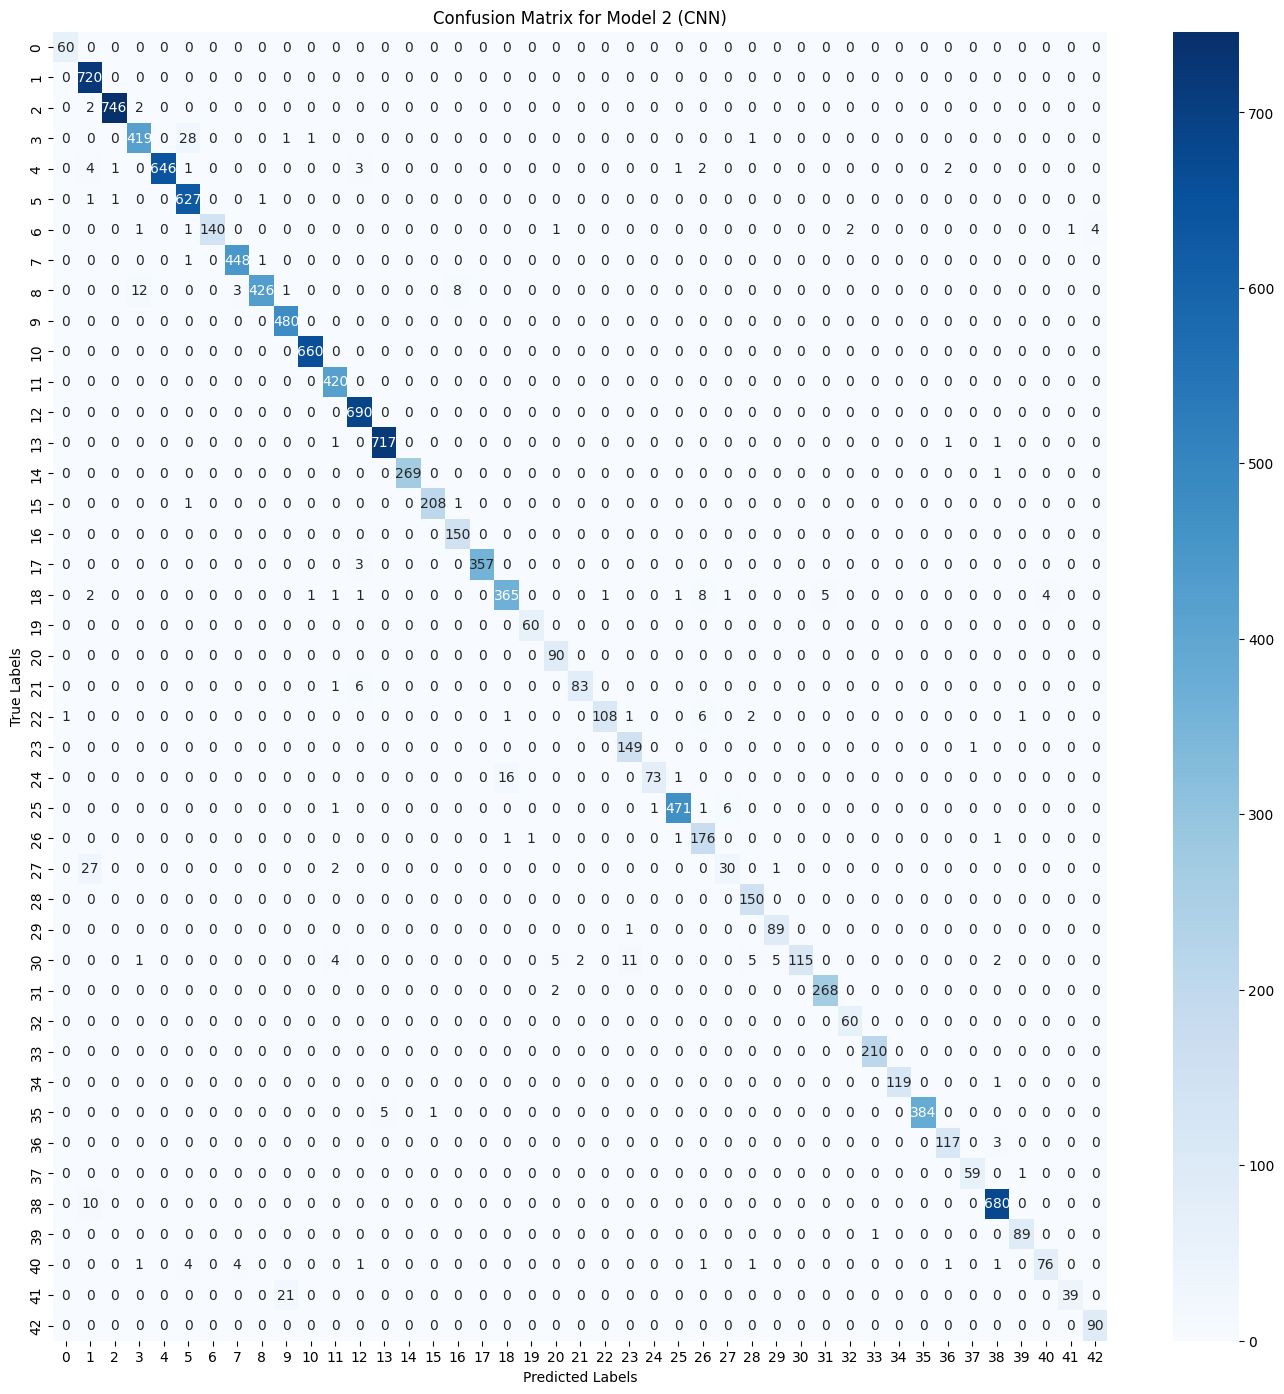

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2 (CNN)')
plt.show()

## Results Comparison among 6 different Neural Networks Architecture

#### Accuracy of different models are:

    AlexNet: 88.84%
    CNN Model: 97.31%

Based on above results, the CNN Model achieved the highest accuracy of 97.31%, making it the most effective architecture for traffic sign classification in this study. The CNN Model likely benefited from its ability to learn complex spatial patterns and hierarchical representations through convolutional and pooling layers.

In conclusion, the CNN Model demonstrated the highest accuracy among the evaluated architectures. These models showcase the effectiveness of convolutional neural networks in traffic sign classification tasks, while VGGNet achieved a comparatively lower accuracy. It is important to note that the choice of the best architecture depends on the specific dataset and task at hand, and further experimentation and tuning may be necessary for optimal results.

### Prediction on Test Data with Convolutional Neural Network model

395/395 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step
Accuracy on real test data: 97.65%
Real Label: 16, Predicted Label: 16


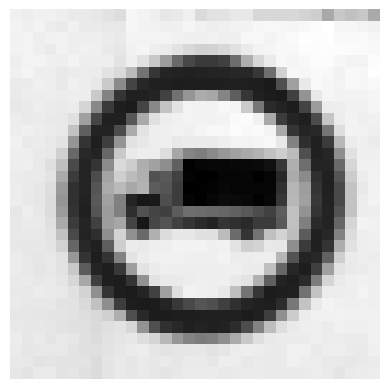

Real Label: 1, Predicted Label: 1


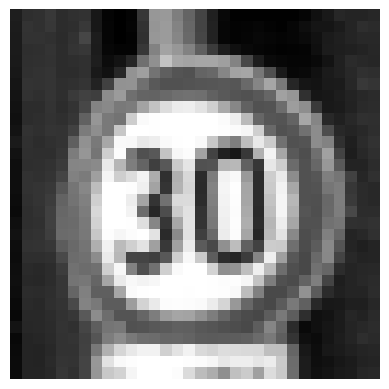

Real Label: 38, Predicted Label: 38


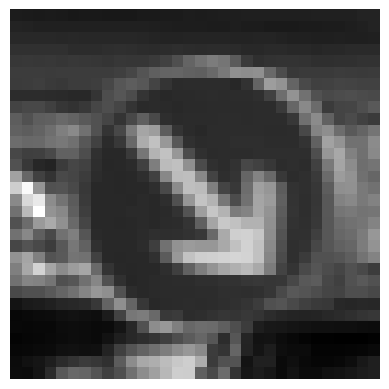

Real Label: 33, Predicted Label: 33


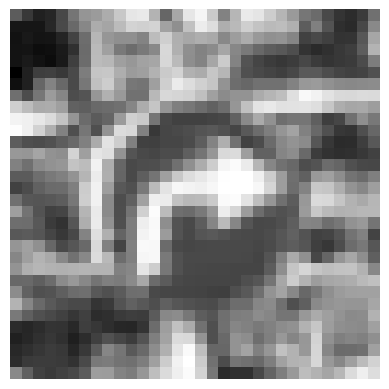

Real Label: 11, Predicted Label: 11


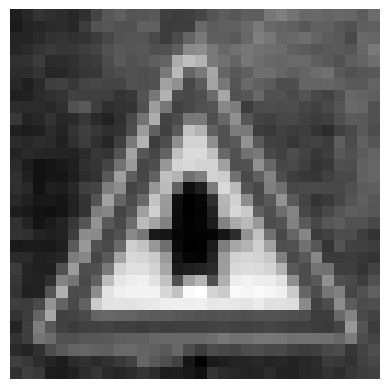

Real Label: 38, Predicted Label: 38


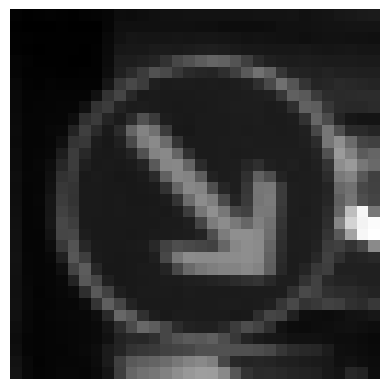

Real Label: 18, Predicted Label: 18


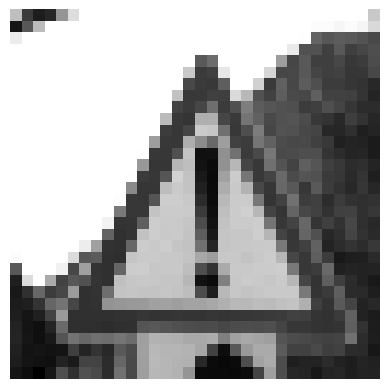

Real Label: 12, Predicted Label: 12


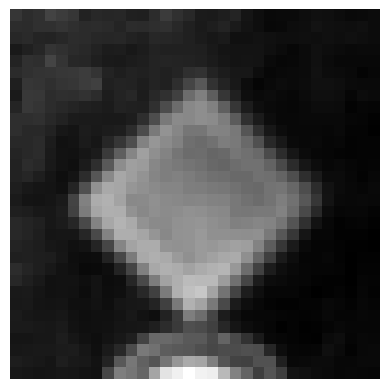

Real Label: 25, Predicted Label: 25


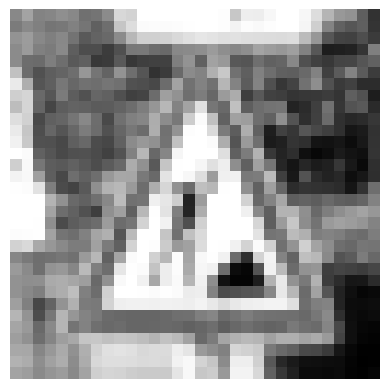

Real Label: 35, Predicted Label: 35


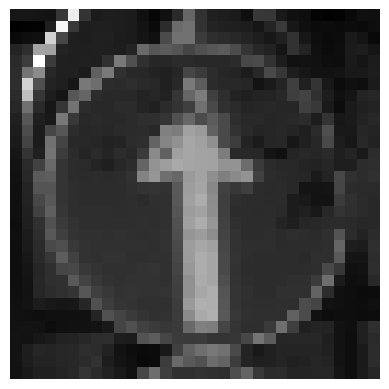

In [ ]:
import numpy as np

# Predict on real test data
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on real test data: {:.2%}".format(accuracy))

# Print test images with real and predicted labels
for i in range(10):
    # Display the test image
    plt.imshow(X_test_gray_norm[i], cmap='gray')
    plt.axis('off')

    # Get the real and predicted labels
    real_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]

    # Print the labels
    print("Real Label: {}, Predicted Label: {}".format(real_label, predicted_label))

    # Show the plot
    plt.show()

In [ ]:
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric']


395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step
Accuracy on test dataset: 97.65%


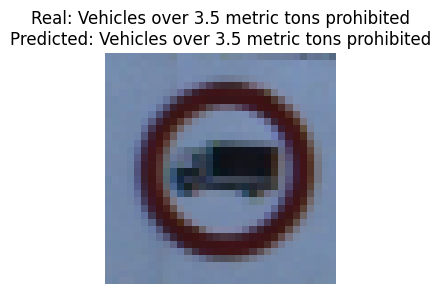

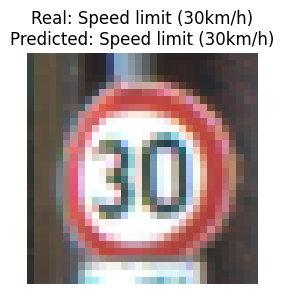

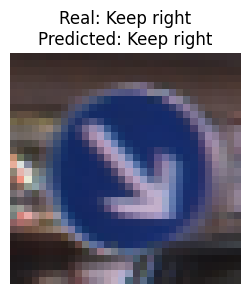

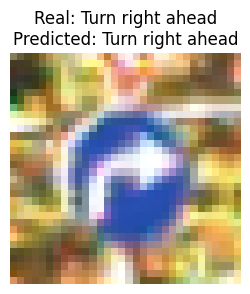

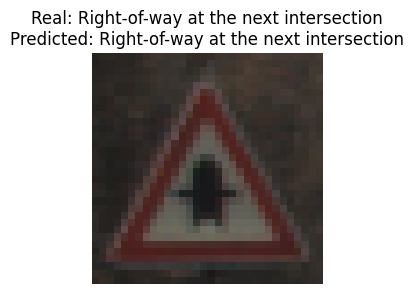

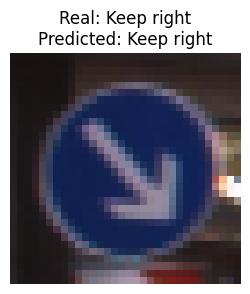

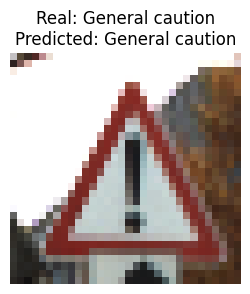

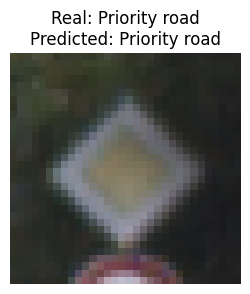

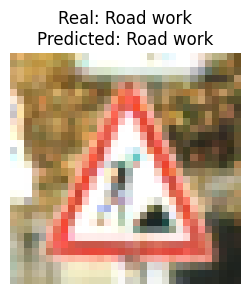

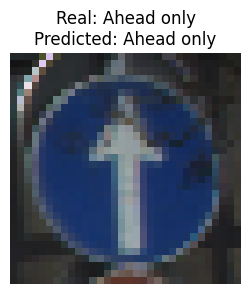

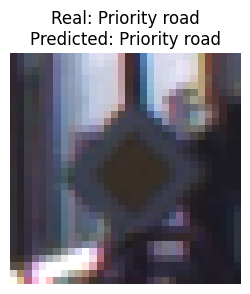

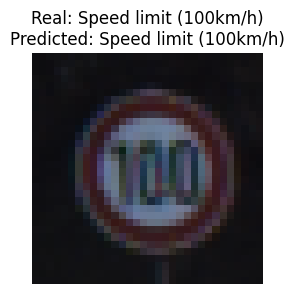

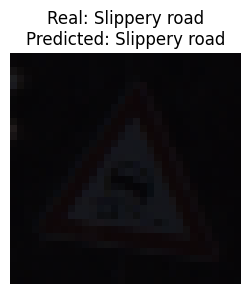

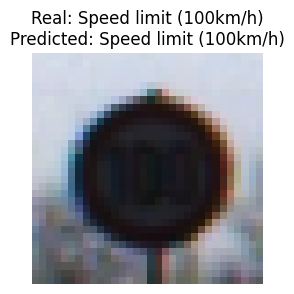

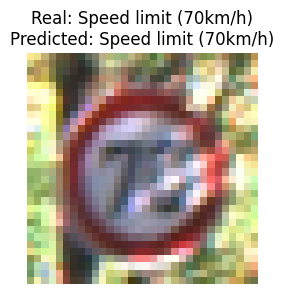

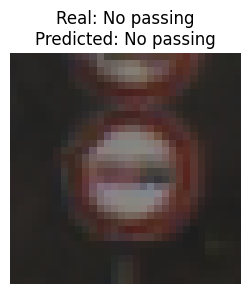

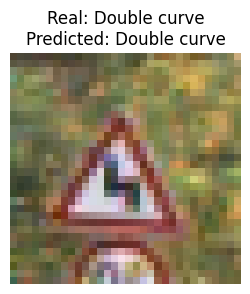

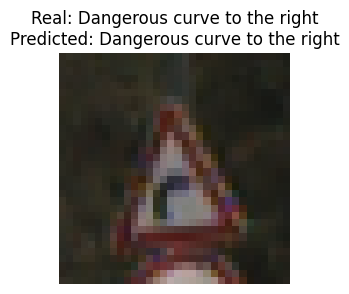

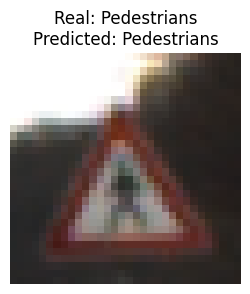

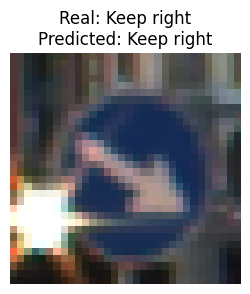

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test dataset
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test dataset: {:.2%}".format(accuracy))

# Visualize the test dataset with real and predicted labels
for i in range(20):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Real: {}\nPredicted: {}".format(sign_names[np.argmax(y_test[i])], predicted_classes[i]))
    plt.axis('off')
    plt.show()


In [32]:
import gradio as gr
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load your best trained model
model = load_model('best_CNN_model.h5')

# 👇 Replace this with your prediction function
def predict_sign(image):
    # Preprocess the image as done for the training data
    img = image.resize((32, 32))  # Resize to 32x32
    img = np.array(img)
    # Convert to grayscale (as done in cell v6OWqK7PMm6a)
    img_gray = np.sum(img/3, axis=2, keepdims=True)
    # Normalize (as done in cell d6VgAqHaM7kd)
    img_gray_norm = (img_gray - 32) / 32
    img_gray_norm = img_gray_norm.reshape(1, 32, 32, 1)  # reshape for prediction


    result = model.predict(img_gray_norm)
    predicted_class_index = np.argmax(result)
    sign = sign_names[predicted_class_index]  # find sign name using the loaded sign_names variable from cell wRn5paLrKuU4
    return sign

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sign,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Road Sign Recognition"
)

interface.launch(share=True)  # share=True gives you a public web link

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://78888706751f0a5079.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
